<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/_001_Classifying_Iris_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**A First Application: Classifying Iris Species**
- In this section, we will go through a simple machine learning application and create
our first model. In the process, we will introduce some core concepts and terms.

- Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters (see Figure 1-2).
- She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.
- **Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris**

- Because we have measurements for which we know the correct species of iris, this is a **supervised learning problem**. In this problem, we want to predict one of several
options (the species of iris). This is an example of a **classification problem**. The possi‐
ble outputs (different species of irises) are called classes. Every iris in the dataset
belongs to one of three classes, so this problem is a **three-class classification problem**.
- The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its label

In [ ]:
# Import the load_iris function from the sklearn.datasets module
from sklearn.datasets import load_iris

# Load the Iris dataset and store it in the variable iris_df
iris_data = load_iris()

In [ ]:
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


##**Understanding the Output of load_iris() Function**
When you use the load_iris() function from scikit-learn, it does not return a DataFrame. Instead, it returns a **Bunch object**, which is a dictionary-like object specifically designed for scikit-learn datasets. This document explains the structure and contents of this Bunch object.

**Bunch Object Structure :** The Bunch object returned by the load_iris() function contains several attributes, each holding specific information about the Iris dataset. Below are the main attributes:

**1. 'data'**
- **Type:** NumPy array
- **Description:** Contains the feature data. Each row represents an instance of the dataset, and each column represents a feature.
- **Use:** This attribute is used to store the actual measurements of the features for each instance in the dataset. For example, in the Iris dataset, these features include sepal length, sepal width, petal length, and petal width.

**2. 'target'**
- **Type:** NumPy array
- **Description:** Contains the target labels. Each element represents the class label for the corresponding instance in the feature data.
- **Use:** This attribute is used to store the labels that correspond to each instance's features. In the Iris dataset, the labels indicate which of the three species of iris (setosa, versicolor, or virginica) each instance belongs to.

**3. 'feature_names'**
- **Type:** List of strings
- **Description:** Contains the names of the features.
- **Use:** This attribute provides the names of the features for reference and better understanding. It helps in identifying what each column in the data attribute represents.

**4. 'target_names'**
- **Type:** NumPy array
- **Description:** Contains the names of the target classes.
- **Use:** This attribute provides the names of the classes or categories in the target attribute. In the Iris dataset, this includes the species names: setosa, versicolor, and virginica.

**5. 'DESCR'**
- **Type:** String
- **Description:** A detailed description of the dataset.
- **Use:** This attribute is used to provide a comprehensive description of the dataset, including information about the features, target classes, and any other relevant details. It is useful for understanding the context and structure of the dataset.

**6. 'filename'**
- **Type:** String
- **Description:** The path to the data file.
- **Use:** This attribute provides the file path where the dataset is stored. It can be useful if you need to reference the original data file for any reason.

In [ ]:
print("Keys of iris_dataset: \n{}".format(iris_data.keys()))
print(iris_data['DESCR'][:193] + "\n...")
print("Target names: {}".format(iris_data['target_names']))
print("Feature names: \n{}".format(iris_data['feature_names']))
print("Type of data: {}".format(type(iris_data['data'])))
print("Shape of data: {}".format(iris_data['data'].shape))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [ ]:
    # 150 entries (instances) and 4 columns (features)
print("First five columns of data:\n{}".format(iris_data['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [66]:
import pandas as pd

# Convert to a Pandas DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target column to the DataFrame
iris_df['target'] = iris_data.target

# Display the first few rows of the DataFrame
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##**Measuring Success: Training and Testing Data**

- We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new
measurements, we need to know whether it actually works—that is, whether we
should trust its predictions

- To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.


In [ ]:
from sklearn.model_selection import train_test_split

# random_state=0: Seed for random number generator for reproducibility
x_train,x_test,y_train,y_test = train_test_split(iris_data['data'],iris_data['target'],random_state=0)


In [ ]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (112, 4)
y_train shape: (112,)


In [ ]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


x_test shape: (38, 4)
y_test shape: (38,)


##**First Things First: Look at Your Data**

- Before building a machine learning model it is often a good idea to inspect the data
- Additionally, inspecting your data is a good way to find abnormalities and peculiari‐
ties. Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common
- One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot,Unfortunately, computer
screens have only two dimensions, which allows us to plot only two (or maybe three)
features at a time
-  It is difficult to plot datasets with more than three features this way.
One way around this problem is to do a pair plot, which looks at all possible pairs of
features

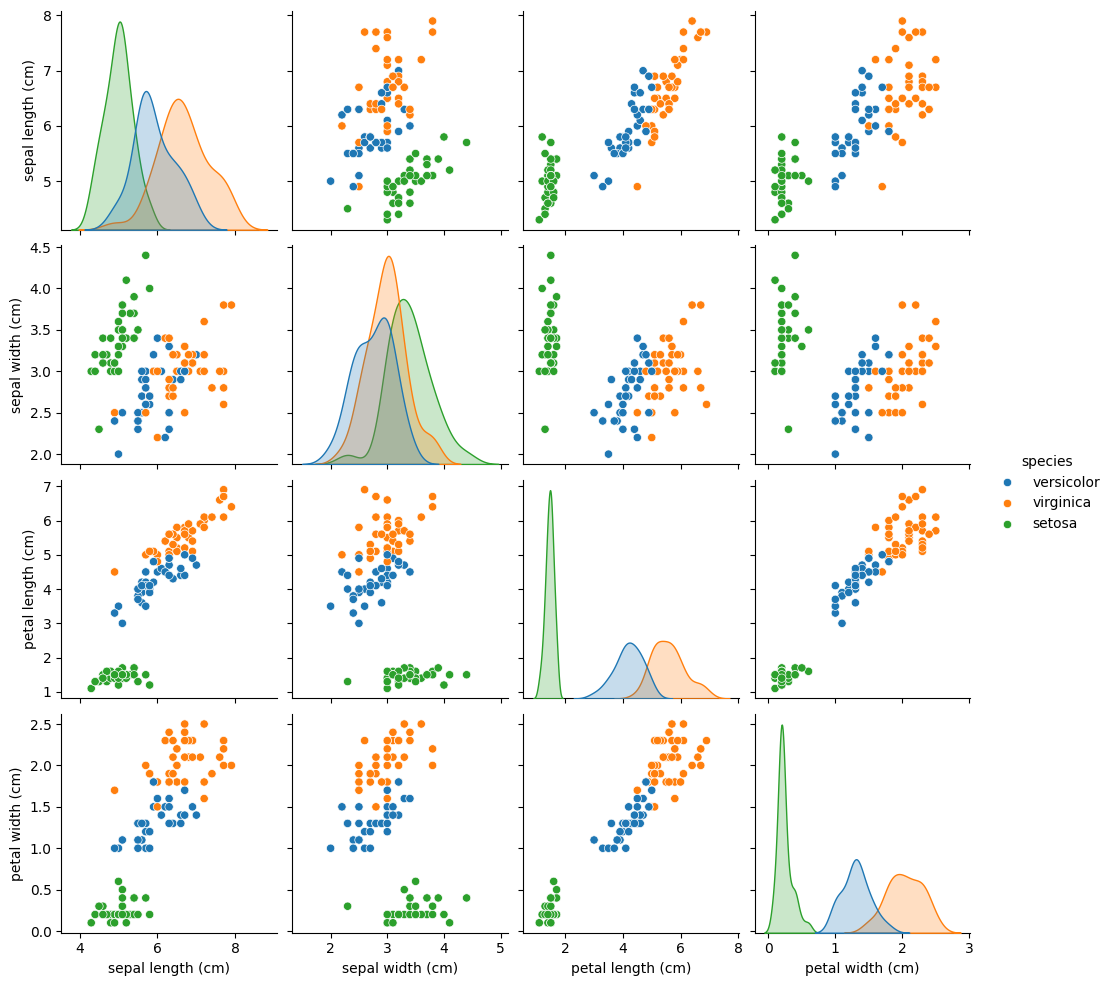

In [59]:
import seaborn as sns



# Create a DataFrame from the training set features (x_train) with column names as feature_names from iris_data
iris_dataframe = pd.DataFrame(x_train, columns=iris_data.feature_names)

# Add a new column 'species' to the DataFrame
# iris_data.target_names[y_train] translates the numeric target labels (y_train) into species names using target_names from iris_data
iris_dataframe['species'] = iris_data.target_names[y_train]

# Create a pairplot using Seaborn
# 'hue='species'' specifies that the data points should be colored by the values in the 'species' column
sns.pairplot(iris_dataframe, hue='species')



##**Building Your First Model: k-Nearest Neighbors**
<img src="https://cdn-images-1.medium.com/max/949/0*34SajbTO2C5Lvigs.png" alt="knn" width="60%">

- Now we can start building the actual machine learning model. There are many classi‐
fication algorithms in scikit-learn that we could use
- Here we will use a k-nearest
neighbors classifier
- which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.
- The k in k-nearest neighbors signifies that instead of using only the closest neighbor
to the new data point, we can consider any fixed number k of neighbors in the train‐
ing (for example, the closest three or five neighbors). Then, we can make a prediction
using the majority class among these neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


'''
The fit method returns the knn object itself (and modifies it in place), so we get a
string representation of our classifier. The representation shows us which parameters
were used in creating the model. Nearly all of them are the default values, but you can
also find n_neighbors=1, which is the parameter that we passed. Most models in
scikit-learn have many parameters, but the majority of them are either speed opti‐
mizations or for very special use cases. You don’t have to worry about the other
parameters shown in this representation. Printing a scikit-learn model can yield
very long strings, but don’t be intimidated by these. We will cover all the important
parameters in Chapter 2. In the remainder of this book, we will not show the output
of fit because it doesn’t contain any new information.
'''
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
  ## Making Predictions
import numpy as np

x_new = np.array([[5,2.9,1,0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_data['target_names'][prediction]))


Prediction: [0]
Predicted target name: ['setosa']


- Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. But how do we know whether we can trust our model? We don’t know the cor‐
rect species of this sample, which is the whole point of building the model!

##**Evaluating the Model**
- This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
- Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted:


In [72]:
y_pred = knn.predict(x_test)
print(f"Test set predictions > {y_pred}")

Test set predictions > [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [75]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))

Test set score: 0.97
Test set score: 0.97


For this model, the test set **accuracy is about 0.97**, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assump‐
tions, **this means that we can expect our model to be correct 97% of the time for new
irises.** For our hobby botanist application, this high level of accuracy means that our
model may be trustworthy enough to use. In later chapters we will discuss how we
can improve performance, and what caveats there are in tuning a model.

##**Summary and Outlook**

We explored machine learning basics and its applications, focusing on supervised learning for classifying iris flowers. Using the Iris dataset, X contained features, y contained labels (0 to 2). We split data into training and test sets. Chose k-nearest neighbors (KNN) for classification, trained our model with fit(), and evaluated its accuracy with score(), achieving 97% accuracy on the test set. This assures us our model will predict iris species accurately most of the time.






